In [32]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Arial',
        'size'   : 12}
matplotlib.rc('font', **font)

In [26]:
comparisons = []
strains = []
num_differences = []

filenames = glob.glob('../../data/kit14/compare_assemblies/*/*.num_diff.txt')
for filename in filenames:
    f = open(filename, 'r')

    comparisons.append(filename.split('/')[-2])
    strains.append(filename.split('/')[-1].split('.')[0])
    num_differences.append(int(f.readlines()[0].split('\n')[0]))
df = pd.DataFrame({'comparison':comparisons, 'strain':strains, 'num_differences':num_differences})
df.sort_values(['comparison', 'strain'], inplace = True, ignore_index = True)

In [27]:
df

,comparison,strain,num_differences
0,flye_medaka,DGI_65,74
1,flye_medaka,DGI_65a_II,76
2,flye_medaka,DGI_65b_IV,72
3,flye_medaka,EEE029,74
4,flye_medaka,EEE029a_VI,66
5,flye_medaka,EEE029b_VI,71
6,medaka_polypolish,DGI_65,105
7,medaka_polypolish,DGI_65a_II,117
8,medaka_polypolish,DGI_65b_IV,110
9,medaka_polypolish,EEE029,111


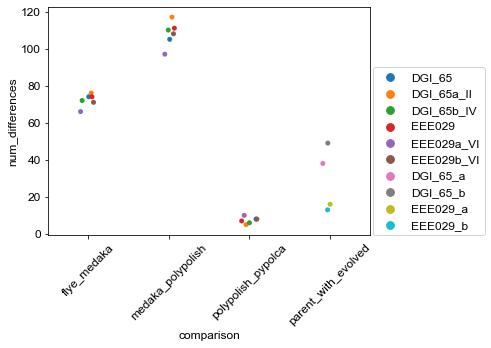

In [45]:
plt.figure(figsize = (7,5))
sns.stripplot(data=df, x="comparison", y="num_differences", hue="strain", order = ['flye_medaka', 'medaka_polypolish', 'polypolish_pypolca', 'parent_with_evolved'])
plt.xticks(rotation = 45)
plt.legend(loc = (1.01, 0))
plt.tight_layout()
plt.savefig('../../figures/assembly_num_differences.png', dpi = 300)
plt.show()